<a href="https://colab.research.google.com/github/AndreMartins21/An-lise-de-Dados-IFES/blob/main/analise_ifes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANÁLISE DE DADOS - IFES 

- Análise de dados a respeito da base de dados divulgadas pelo Instituto Federal do Espírito Santo (IFES)

In [ ]:
# Importações das bibliotecas e do arquivo CSV

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/ALUNOS-DA-GRADUACAO.csv', sep=';')

df.head()

,Matrícula,Instituição,Sexo,Curso,Turno,Turma Atual,Per. Let. Ingresso
0,20201SEAQUI027,Campus de Alegre,F,Bacharel em Engenharia de Aquicultura,Integral,20201.SEAQUI.1,2020/1
1,20161SEAQUI0170,Campus de Alegre,M,Bacharel em Engenharia de Aquicultura,Integral,20202.SEAQUI.2,2016/1
2,20141SEAQUI0267,Campus de Alegre,M,Bacharel em Engenharia de Aquicultura,Integral,20202.SEAQUI.2,2014/1
3,20151SEAQUI0247,Campus de Alegre,F,Bacharel em Engenharia de Aquicultura,Integral,20202.SBCB.10,2015/1
4,20201SEAQUI003,Campus de Alegre,M,Bacharel em Engenharia de Aquicultura,Integral,20202.SEAQUI.2,2020/1


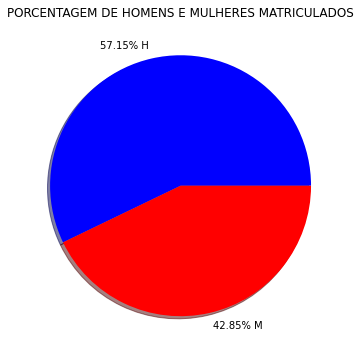

In [ ]:
# Número de Homens e Mulheres matriculados:

analise_HM = df.groupby('Sexo')['Matrícula'].count()

'Cálculo da porcentagem de cada um'
homens = analise_HM['M'] * 100 / analise_HM.sum()
mulheres = analise_HM['F'] * 100 / analise_HM.sum()

slices = [homens, mulheres] 
label = [f'{homens}% H', f'{mulheres}% M']

plt.figure(figsize=(10, 6))
plt.pie(slices, labels = label, colors = ['blue', 'red'], shadow = True)
plt.title("Porcentagem de homens e mulheres matriculados".upper())
plt.show()


,CURSO,N° DE MATRICULADOS
1,Engenharia Mecânica,659
2,Licenciatura em Letras Português,587
3,Bacharelado em Sistemas de Informação,527
4,Bacharelado em Administração,498
5,Engenharia de Controle e Automação,395


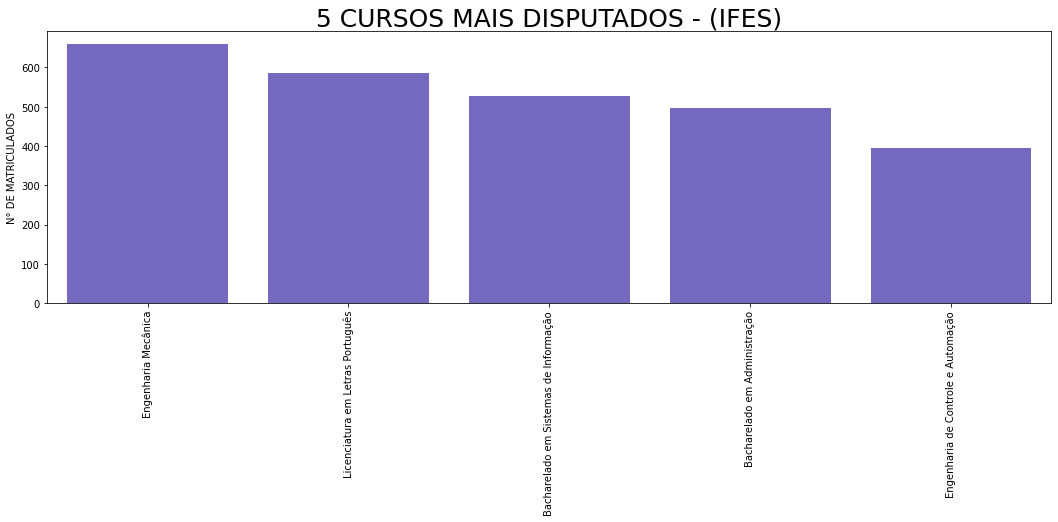

In [ ]:
# 5 CURSOS MAIS DISPUTADOS

'Agrupamento por cursos, salvando na variável apenas os 5 mais requisitados'

cursos_disputados = df.groupby('Curso').count().sort_values(by = 'Matrícula', ascending = False).head(5)

dicio_cursos = {
    "CURSO": cursos_disputados.index,
    "N° DE MATRICULADOS": cursos_disputados['Sexo'].values
}

data_cursos = pd.DataFrame(dicio_cursos, index= np.arange(1, 6))

plt.figure(figsize=(18, 5))
sns.barplot(data = data_cursos, x = 'CURSO', y = 'N° DE MATRICULADOS', color = 'slateblue')
plt.title('5 CURSOS MAIS DISPUTADOS - (IFES)', fontsize = 25)
plt.xlabel('')
plt.xticks(rotation = 90)

display(data_cursos)

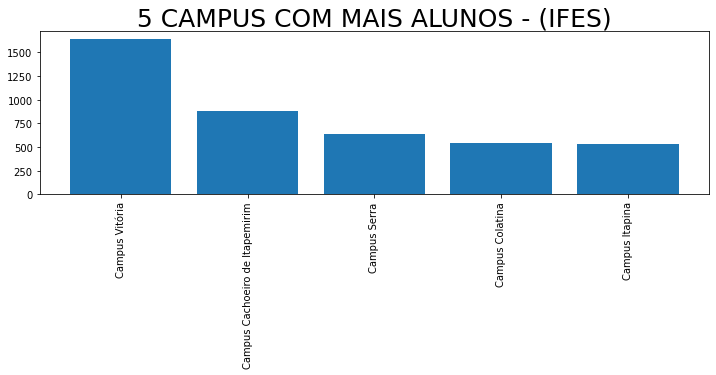

In [ ]:
# 5 CAMPUS COM MAIS ALUNOS

filtro_campus = df["Instituição"].value_counts().head(5)

dicio_campus = {
    'CAMPUS': filtro_campus.index,
    "N° DE MATRICULADOS": filtro_campus.values
}

plt.figure(figsize=(12, 3))
plt.bar(dicio_campus['CAMPUS'], dicio_campus['N° DE MATRICULADOS'])
plt.title('5 CAMPUS COM MAIS ALUNOS - (IFES)', fontsize = 25)
plt.xticks(rotation = 90)
plt.show()